In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

C:\Users\thuch\AppData\Local\Temp\ipykernel_16160\615660788.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [61]:
#Importing data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [62]:
target = "satisfaction"

In [63]:
train = train.drop(['Unnamed: 0', 'id'], axis = 1)
test = test.drop(['Unnamed: 0', 'id'], axis = 1)

In [64]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

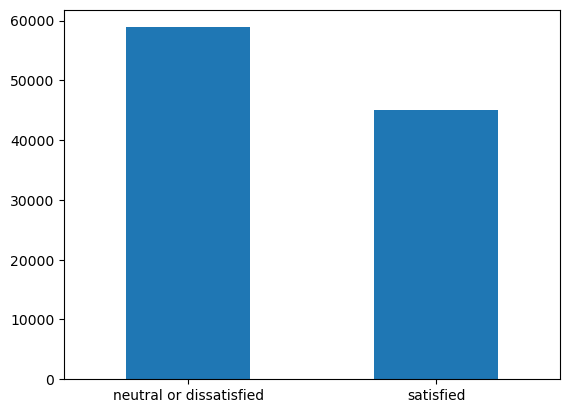

In [66]:
train['satisfaction'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)

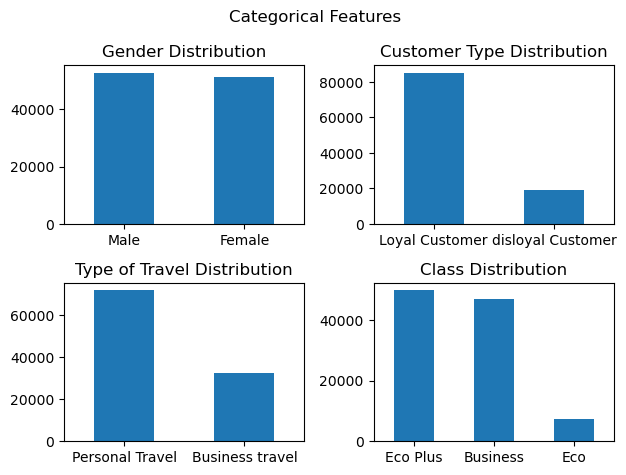

In [71]:
categorical_col = ['Gender','Customer Type', 'Type of Travel', 'Class']
fig, axes = plt.subplots(2,2)
for i, ax in enumerate(axes.flatten()):
    train[categorical_col[i]].value_counts().plot(kind = 'bar',ax = ax)
    ax.set_title(f'{categorical_col[i]} Distribution')
    ax.set_xticklabels(train[categorical_col[i]].unique(),rotation=0)
#plt.tight_layout()
fig.suptitle('Categorical Features')
plt.tight_layout()

In [72]:
numerical = ['Age','Flight Distance','Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
train[numerical]

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


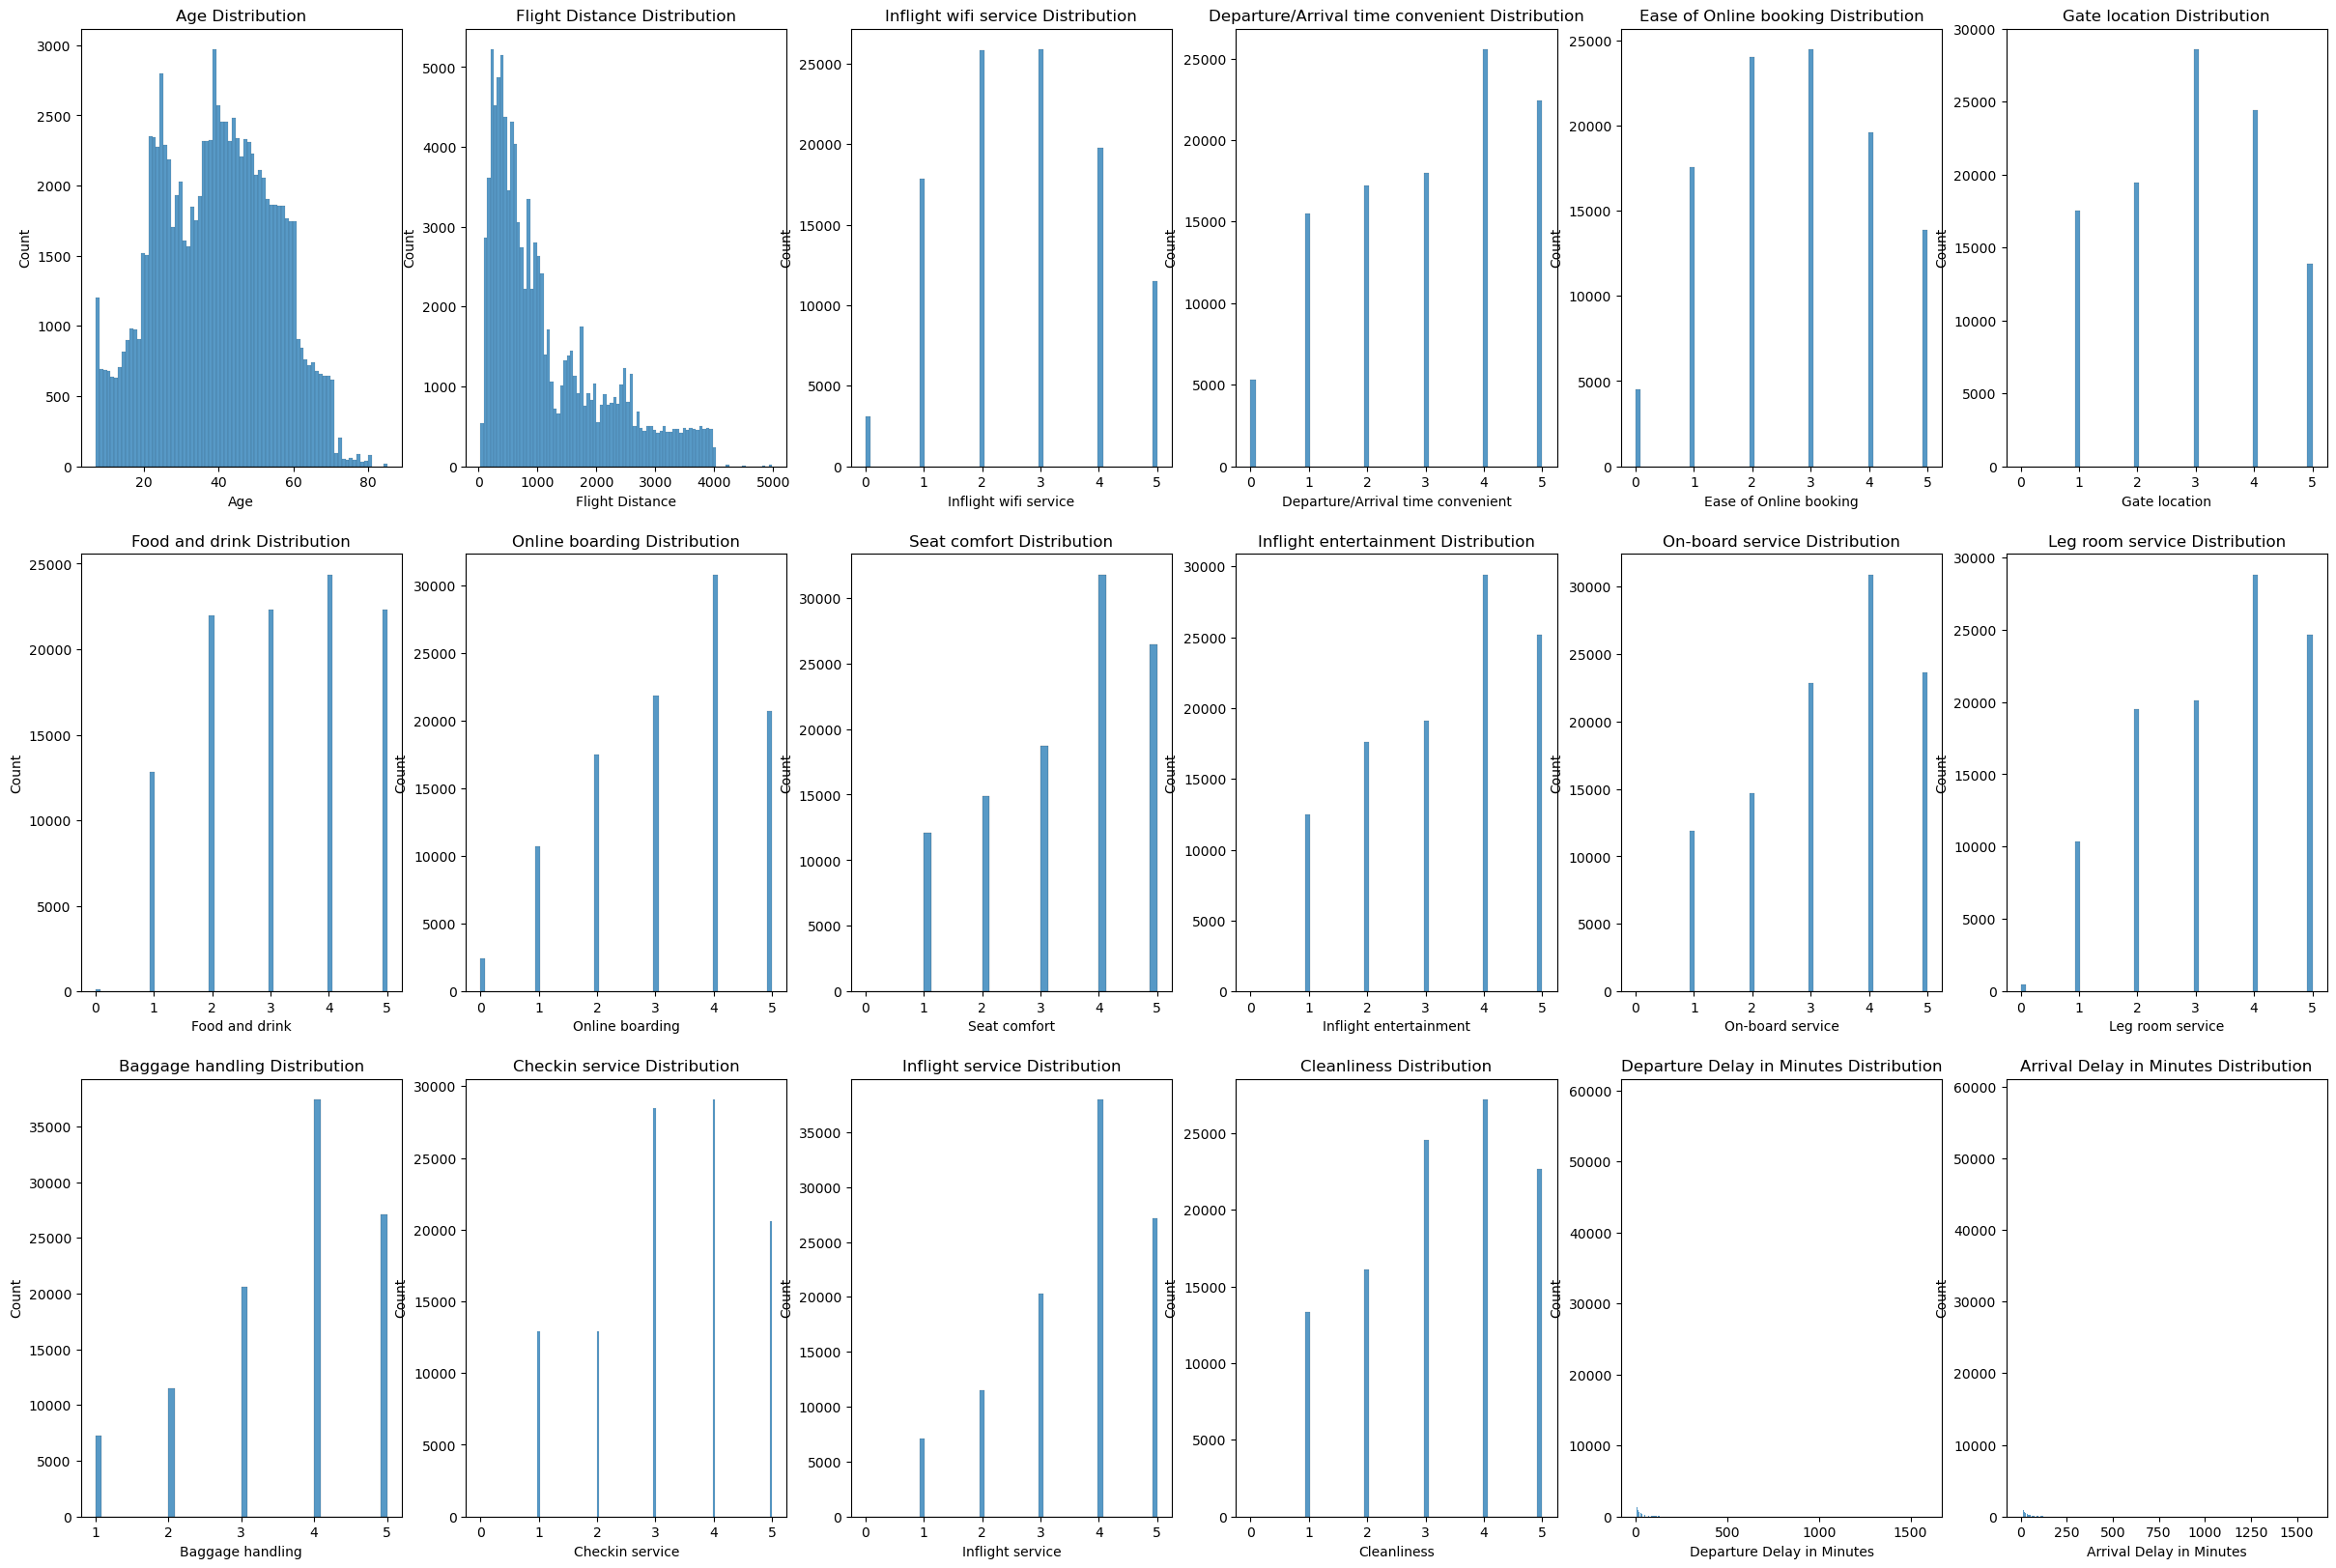

In [78]:
fig, axes = plt.subplots(3,6)
for i, ax in enumerate(axes.flatten()):
    sns.histplot(train[numerical[i]],ax = ax)
    #train[categorical_col[i]].value_counts().plot(kind = 'bar',ax = ax)
    ax.set_title(f'{numerical[i]} Distribution')
    #ax.set_xticklabels(train[categorical_col[i]].unique(),rotation=0)
fig.set_figheight(20)
fig.set_figwidth(30)

C:\Users\thuch\AppData\Local\Temp\ipykernel_16160\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<AxesSubplot:>

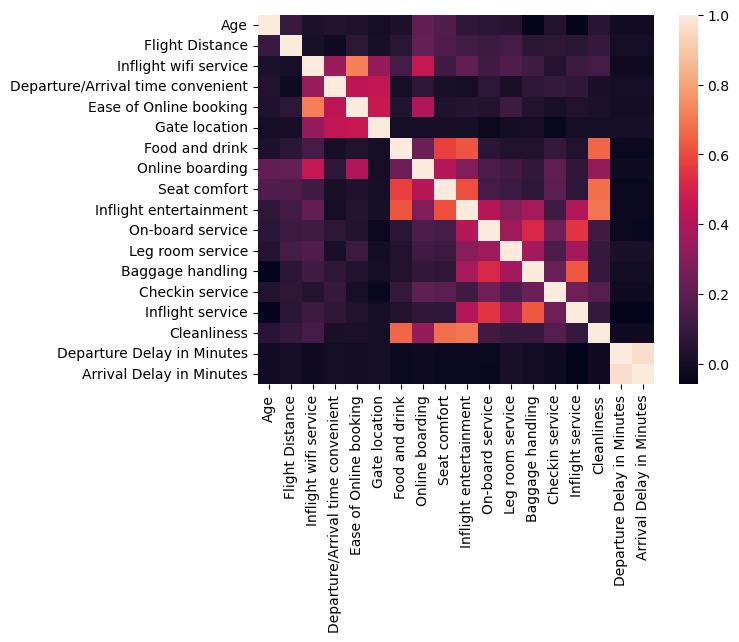

In [39]:
sns.heatmap(train.corr())

In [45]:
#DROPPING COLUMNS
train = train.drop(['Gender', 'Arrival Delay in Minutes'], axis = 1)
test = test.drop(['Gender', 'Arrival Delay in Minutes'], axis = 1)
#CATEGORIZE
train["satisfaction"].replace({"neutral or dissatisfied":0,"satisfied":1},inplace = True)
test["satisfaction"].replace({"neutral or dissatisfied":0,"satisfied":1},inplace = True)

In [43]:
#MODELING

In [48]:
#SVM
train_svm = train.copy()
test_svm = test.copy()
train_svm = pd.get_dummies(train_svm, drop_first = True)
test_svm = pd.get_dummies(test_svm, drop_first = True)
scale = StandardScaler()
X_train = train_svm.drop(target, axis=1)
y_train = train_svm[target]
X_test = test_svm.drop(columns = 'satisfaction', axis=1)
y_test = test_svm[target]
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
svm = SVC(C = 1,kernel = 'rbf')
X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_train, y_train, test_size=.2, random_state=0)
svm.fit(X_trainset,y_trainset)
y_valpred = svm.predict(X_valset)
accuracy_score(y_valset,y_valpred)

0.9559212742408931

In [49]:
r2_score(y_valset,y_valpred)

0.8205214866715815

In [50]:
y_test_pred = svm.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9549199260856175

In [51]:
r2_score(y_test,y_test_pred)

0.816953646574989

In [54]:
#Catboost
train_bl = train.copy()
train_bl = pd.get_dummies(train_bl,drop_first = True)
X_bl = train_bl.drop([target],axis = 1)
y_bl = train_bl[target]
X_train, X_val, y_train, y_val = train_test_split(X_bl, y_bl, test_size=.2, random_state=0)
catboost_bl = CatBoostClassifier(verbose=200)
catboost_bl.fit(X_train, y_train)
y_pred = catboost_bl.predict(X_val)
accuracy_score(y_pred,y_val)

Learning rate set to 0.068023
0:	learn: 0.6023302	total: 180ms	remaining: 3m
200:	learn: 0.0936088	total: 5.82s	remaining: 23.1s
400:	learn: 0.0799631	total: 11s	remaining: 16.4s
600:	learn: 0.0728697	total: 16.1s	remaining: 10.7s
800:	learn: 0.0675239	total: 21.4s	remaining: 5.32s
999:	learn: 0.0631044	total: 27s	remaining: 0us


0.9637168567441413

In [55]:
r2_score(y_pred,y_val)

0.8511524987354178

In [56]:
test_bl = test.copy()
test_bl.dropna(axis = 0,inplace = True)
test_bl = pd.get_dummies(test_bl)
X_test_bl = test_bl.drop([target],axis = 1)
y_test_bl = test_bl[target]
y_test_pred = catboost_bl.predict(X_test_bl)

In [57]:
accuracy_score(y_test_bl,y_test_pred)

0.9632737911918694

In [58]:
r2_score(y_test_bl,y_test_pred)

0.8508742773975573